In [92]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
DIRECTORY=r'/content/drive/MyDrive/Covid_Xray/Covid_Xray'
CATEGORIES=['Covid19 Negative','Covid19 Positive']

In [95]:
IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        try:
           img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
           #print(img.shape)
        except:
           break
        #img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])

In [96]:
len(data)

538

In [97]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [98]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [99]:
X.shape

print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [100]:
pickle.dump(data,open("dataset",'wb'))

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [102]:
model=Sequential()

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(3,activation='softmax'))

In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [104]:
model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
16/16 [==============================] - 10s 571ms/step - loss: 0.2570 - accuracy: 0.8034 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
16/16 [==============================] - 9s 556ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
16/16 [==============================] - 9s 554ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
16/16 [==============================] - 9s 555ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
16/16 [==============================] - 9s 565ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 9s 555ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
16/16 [==============================] - 9s 557ms/step - loss: 0.0000e+00 - accuracy: 1.0000

In [105]:
history = model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
16/16 [==============================] - 9s 561ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
16/16 [==============================] - 9s 560ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
16/16 [==============================] - 9s 557ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
16/16 [==============================] - 9s 557ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
16/16 [==============================] - 9s 565ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 9s 556ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
16/16 [==============================] - 9s 560ms/step - loss: 0.0000e+00 - accuracy: 1.0

In [106]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


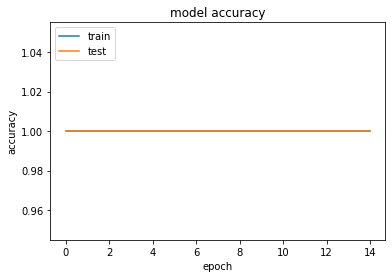

In [86]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

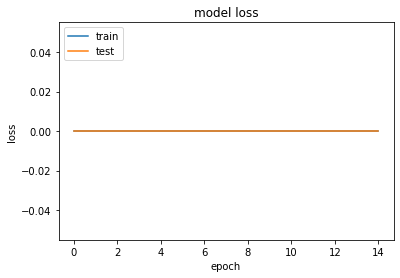

In [87]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)             

In [108]:
model.save("my_model1")
#model.save("/content/drive/MyDrive/Models/my_model")

INFO:tensorflow:Assets written to: my_model1/assets


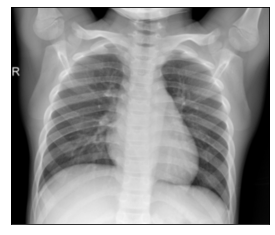

[[0. 1. 0.]]
COVID-19-TEST: POSITIVE


In [109]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/n7.jpeg'

img = cv2.imread(testimage,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = keras.preprocessing.image.load_img(
    testimage, target_size=(IMG_SIZE, IMG_SIZE)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])
predictions
print(predictions)
if(predictions[0][0]>0.8):
    print("COVID-19-TEST: NEGATIVE")

if(predictions[0][1]>0.8):
    print("COVID-19-TEST: POSITIVE")